# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 3: *OptimalThresholding*
Create a binary image by finding an optimal threshold
***  

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Module functions
from ImageUtilities import imageReadL, plotImageL, createVectorF
from PlotUtilities import plotHistogram
from ImageOperatorsUtilities import computeHistogram, thresholdImage

### Parameters:
    imageName = Input image name

In [2]:
imageName = "Horse.png"

### Read and show input image

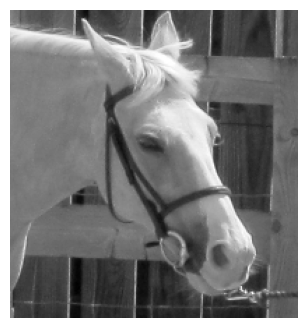

In [3]:
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter3/Input/")
inputImage, width, height  = imageReadL(pathToDir + imageName)
plotImageL(inputImage, figureSize = 4)

### Compute and show histogram of the input image

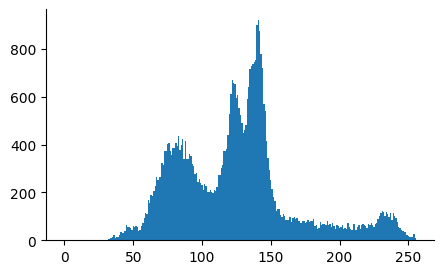

In [4]:
inputHistogram = computeHistogram(inputImage)
plotHistogram(inputHistogram)

### Find optimal threshold

In [5]:
# Create histograms to store cumulative moments
w = createVectorF(256)
m = createVectorF(256)

# Create histograms to store separation 
separability = createVectorF(256)

# Obtain histograms
normalization = 1.0 / float(width * height)
w[0] = normalization * inputHistogram[0]
for level in range(1, 256):
    w[level] = w[level-1] + normalization * inputHistogram[level]
    m[level] = m[level-1] + level * normalization * inputHistogram[level]
    
# Look for the maximum
maximumLevel = 0 
for level in range(0, 256):
    if w[level] * (float(level) - w[level]) != 0:
        separability[level] = float(pow( ( m[255] * w[level] - m[level]), 2)      \
                                   / (w[level] * (float(level) - w[level])))
            
        if separability[level] > separability[maximumLevel]:
            maximumLevel = level

### Show separation histogram

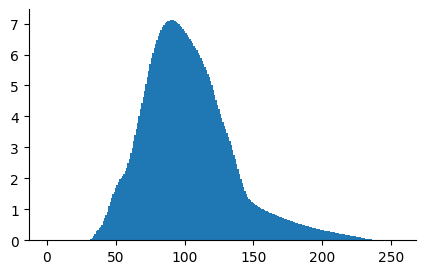

In [6]:
plotHistogram(separability)

### Apply threshold and show image

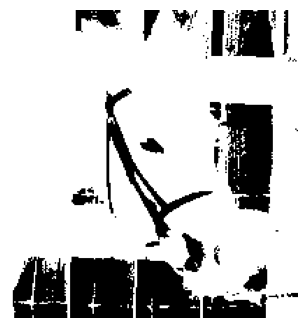

In [7]:
outputImage = thresholdImage(inputImage, maximumLevel)
plotImageL(outputImage, figureSize = 4)